# California Housing Price Prediction 

### Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

### Data Description : 



    
<ol>         
<h4>Field and Description </h4>
<li>longitude	(signed numeric-float)       : Longitude value for the block in California, USA</li>
<li>latitude	(numeric-float )             : Latitude value for the block in California, USA </li>
<li>housing_median_age	(numeric-int )       : Median age of the house in the block</li>
<li>total_rooms	(numeric-int )               : Count of the total number of rooms (excluding bedrooms) in all houses in the block</li>
<li>total_bedrooms	(numeric-float )         : Count of the total number of bedrooms in all houses in the block</li>
<li>population	(numeric-int )               : Count of the total number of population in the block</li>
<li>households	(numeric-int )               : Count of the total number of households in the block</li>
<li>median_income	(numeric-float )         : Median of the total household income of all the houses in the block</li>
<li>ocean_proximity	(numeric-categorical )   : Type of the landscape of the block['NEAR BAY','<1H OCEAN','INLAND','NEAR OCEAN','ISLAND']      </li>
<li>median_house_value	(numeric - int )       : Median of the household prices of all the houses in the block </li>
</ol>

In [166]:
# Importing all the necessary packages . 
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

In [125]:
### Geting the path of current working directory

currdir=os.getcwd()
print(currdir)

C:\Users\Bhanusri\Desktop\Bhanu DS\DS with Python\project1


In [126]:
###Checking whether the required datafile is present in the Current directory.

print(os.listdir(os.getcwd()))

['.ipynb_checkpoints', 'Housing Project.ipynb', 'housing.xlsx']


###  TASK1: Load the data

In [127]:
### Reading data from input data file and storing it into a Dataframe

currfile = currdir + '\housing.xlsx'
##df=pd.read_excel(r"C:\Users\Bhanusri\Desktop\Bhanu DS\DS with Python\project1\housing.xlsx")
df=pd.read_excel(currfile)

In [128]:
###Viewing the first five records of the Dataframe . 

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [129]:
##Checking the shape of the Dataframe created. 

df.shape

(20640, 10)

In [130]:
### Viewing the desciption of Data 

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [131]:
### Viewing the information of the Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### TASK2: Handling Missing Values 

In [132]:
###Checking whether any of the Features/Independent Variables are having null values . 

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [133]:
###Filling the null values of the column "total_bedrooms" with its mean value. 

df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)

In [134]:
### Checking Whether all null values are replaced correctly

df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [135]:
df['total_bedrooms'].mean()

537.8705525375639

### TASK3: Encode categorical data 

In [136]:
#### Viewing the Data types of all columns

df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [137]:
### Viewing the data of categorical column

df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [138]:
### Converting the categorical column "Ocean Proximity"  into Numeric using one hot encoding technique .

df=pd.get_dummies(df,columns=['ocean_proximity'])
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [139]:
### Viewing the data type after converting data of the categorical column

df.dtypes

longitude                     float64
latitude                      float64
housing_median_age              int64
total_rooms                     int64
total_bedrooms                float64
population                      int64
households                      int64
median_income                 float64
median_house_value              int64
ocean_proximity_<1H OCEAN       uint8
ocean_proximity_INLAND          uint8
ocean_proximity_ISLAND          uint8
ocean_proximity_NEAR BAY        uint8
ocean_proximity_NEAR OCEAN      uint8
dtype: object

In [140]:
### Checking the shape and columns of the Dataset .

df.shape,df.columns

((20640, 14),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity_<1H OCEAN',
        'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
        'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
       dtype='object'))

### TASK4: Split the dataset 

In [141]:
### Divining the columns of the Dataframe into Features and Labels .

x_feature = df.drop(['median_house_value'],axis=1)  ## Features/Independent Variable
y_target=df[['median_house_value']] ## Label/Dependent Variable 
x_feature.shape,y_target.shape

((20640, 13), (20640, 1))

In [142]:
### Partitioning the data into Train and Test.

x_train,x_test,y_train,y_test=train_test_split(x_feature,y_target,test_size=.2,random_state=40)

In [143]:
### Checking the shape of the data partions created 

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16512, 13), (4128, 13), (16512, 1), (4128, 1))

### TASK5: Standardize data 

In [144]:
### Normalizing the Data Partitions created using StandardScaler class Object

scal = StandardScaler()
scaled_x_train = scal.fit_transform(x_train)
scaled_x_test = scal.transform(x_test)

### TASK6: Perform Linear Regression 

In [145]:
### Creating the Linear Regression Model on the Train dataset using LinearRegression class object. 

linreg = LinearRegression()
linreg.fit(scaled_x_train,y_train)

LinearRegression()

In [146]:
### Predicting the Target variable i.e., Housing Price for the Test data with the model built .

y_pred_test=linreg.predict(scaled_x_test)

In [147]:
### Viewing the Data Predicted

y_pred_test[0:10]

array([[220212.43148434],
       [258804.28231359],
       [136887.48407897],
       [177193.08466964],
       [210749.42784589],
       [195313.7823858 ],
       [291842.15286277],
       [126843.78462838],
       [314439.16391496],
       [299867.71279969]])

In [148]:
### Viewing SLOPES / Coefficient/ Betas OF FEATURES

linreg.coef_  ## SLOPES / Coefficient/ Betas OF FEATURES

array([[-53094.69986788, -53764.09652131,  13249.14203681,
        -11540.48931322,  32782.53735114, -42407.32678176,
         25854.15165715,  73453.52931734,   5959.87924195,
        -12525.66808695,   2371.84073106,   2598.0592647 ,
          6018.51243363]])

In [149]:
### Viewing  CONSTANT / INTERCEPT

linreg.intercept_  

array([206139.59823159])

In [150]:
### Checking the performance of the model on the Train Data

linreg.score(scaled_x_train,y_train)

0.6433224735396106

In [151]:
### Checking the performance of the model on the Test data. 

linreg.score(scaled_x_test,y_test)

0.6528491497071673

In [152]:
### Calculating the Root Mean Square Error .


np.sqrt(mean_squared_error(y_test,y_pred_test)),mean_squared_error(y_test,y_pred_test)

(69228.25351819966, 4792551085.180124)

### Bonus Exercise:  Perform Linear Regression with one independent variable 

In [153]:
### Creating Test and Train Feature dataset using only one varible. 

uni_x_train = x_train[['median_income']]
uni_x_test = x_test[['median_income']]
y_train

,median_house_value
9226,63300
11826,174300
4553,350000
10787,268800
4104,385900
...,...
11532,61300
16065,329200
14501,100000
14555,240200


In [154]:
### Building the Linear Regression model for the new Training dataset using LinearRegression Object

Ulinreg = LinearRegression()
Ulinreg.fit(uni_x_train,y_train)
##y_train.shape

LinearRegression()

In [155]:
### Predicting the Target Variable for Train data

Uy_pred_train=Ulinreg.predict(uni_x_train)

In [156]:
### Predicting The Test Variable for Test data

Uy_pred_test=Ulinreg.predict(uni_x_test)

In [157]:
### Viewing the slope(beta) and intercept of the model

Ulinreg.coef_,Ulinreg.intercept_

(array([[41779.4211463]]), array([44628.26740003]))

In [158]:
### Checking the performance of the model for the Test Data

Ulinreg.score(uni_x_test,y_test)

0.4651186283141753

In [159]:
### Checking the performance of the model for the Train Data. 

Ulinreg.score(uni_x_train,y_train)

0.4754993648770358

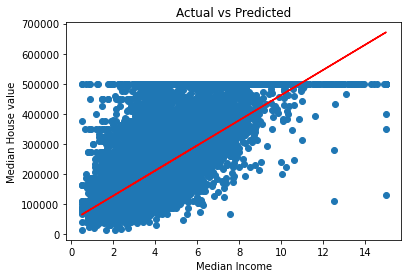

In [160]:
### Plotting Scatter and linear plot of Actual vs Predicted Train Data .


plt.scatter(uni_x_train,y_train)
plt.plot(uni_x_train,Uy_pred_train,color='red',
         label='Train')
plt.title("Actual vs Predicted")
plt.xlabel("Median Income")
plt.ylabel("Median House value")
plt.show()

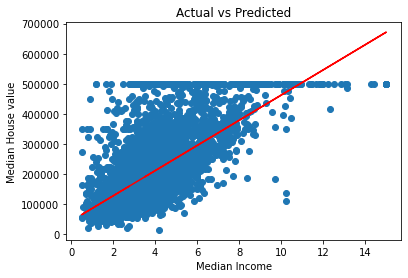

In [161]:
### Plotting Scatter and linear plot of Actual vs Predicted Test Data .



plt.scatter(uni_x_test,y_test)
plt.plot(uni_x_test,Uy_pred_test,color='red')
plt.title("Actual vs Predicted")
plt.xlabel("Median Income")
plt.ylabel("Median House value")
plt.show()

### Conclusion : Model Built is performing same on both Test Data and Train Data